<a href="https://colab.research.google.com/github/seremmartin64-ops/ML/blob/main/iris_csv_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("uciml/iris")
print(os.listdir(path))

file_path = os.path.join(path, "Iris.csv")


Using Colab cache for faster access to the 'iris' dataset.
['Iris.csv', 'database.sqlite']


In [24]:
df = pd.read_csv(file_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# drop id column if it exist
df = df.drop(columns=['Id'],errors='ignore')

# Encode class labels(sentosa,versicolor,virginica)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# split features (x)and label (y)
x = df.drop('Species', axis=1)
y = df['Species']

# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# split it into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

Building a Neural Network

In [26]:
import warnings
warnings.filterwarnings('ignore')

model = keras.Sequential([
    layers.Dense(8, activation = 'relu', input_shape = (4,)),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [27]:
# if its classification, them
# 1.Optimizer-> Adam
# 2.loss->sparse_categorical_crossentropy(more than three output/class), binary_crossentropy(TWo classes)
# 3.metrics->r2

# regression
# 1.optimizer->adam
# 2.loss-> mean_squared_error
# 3.metric->r2

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

Train the model

In [28]:
history = model.fit(x_train, y_train, epochs=100,batch_size=8,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1673 - loss: 1.2586    
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2094 - loss: 1.1791 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2089 - loss: 1.1180     
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3481 - loss: 1.0627 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4406 - loss: 1.0312 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 1.0036 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5421 - loss: 1.0089 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.9833 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8822 - loss: 0.9065 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.9282 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8339 - loss: 0.8975 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

Evalute the model

In [29]:
loss,accuracy = model.evaluate(x_test, y_test,verbose=0)
print(f'model accuracy:{accuracy:.2f}')
print(f'model loss:{loss}')

model accuracy:1.00
model loss:0.16304555535316467


Make predictions

In [30]:
predictions = model.predict(x_test [:5])
print('predicted classes:',np.argmax(predictions,axis=1))
print('actual classes:',y_test[:5].values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
predicted classes: [1 0 2 1 1]
actual classes: [1 0 2 1 1]


Visualize the training progress

<function matplotlib.pyplot.show(close=None, block=None)>

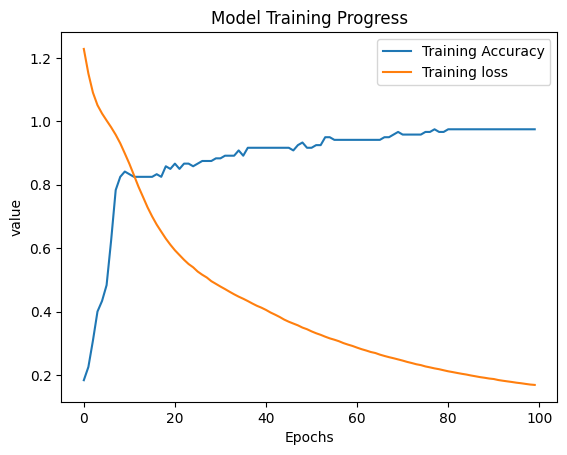

In [31]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['loss'],label='Training loss')
plt.title( 'Model Training Progress')
plt.xlabel('Epochs')
plt.ylabel('value')
plt.legend()
plt.show